In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
!pip3 install chart-studio
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/NLP.csv',low_memory=False)

In [ ]:
df.head()

,crid,summary,add2,city,incident_date,point,source,beat_id,is_officer_complaint,add1,location,old_complaint_address,first_end_date,first_start_date,most_common_category_id,coaccused_count,subjects,created_at,updated_at,is_extracted_summary,cr_text,id,start_date,end_date,officer_age,recc_finding,recc_outcome,final_finding,final_outcome,final_outcome_class,allegation_category_id,officer_id,disciplined,created_at.1,updated_at.1,allegation_id,id.1,category_code,category,allegation_name,on_duty,citizen_dept,created_at.2,updated_at.2
0,C181899,NaN,NaN,NaN,1986-06-02 00:00:00+00,0101000020E6100000379902E3AAEE55C0C5D3E1D7FEEA...,NaN,NaN,False,NaN,NaN,31XX S KEELER,1994-01-12,1991-01-23,159,1,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,11062,1991-01-23,1994-01-12,NaN,NaN,Unknown,SU,Separation,NaN,159,31597,True,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,C181899,159,08N,Criminal Misconduct,Conspiracy To Commit A Crime,True,citizen,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
1,1054738,NaN,S JUSTINE ST Apt: 1,CHICAGO IL 60620,2012-06-13 00:00:00+00,0101000020E6100000FA5866B650EA55C003C70A2362DC...,NaN,244.0,False,94XX,Public Way - Other,NaN,2012-09-20,2012-06-13,204,2,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,Initial / Intake Allegation 1: The complainant...,224509,2012-06-13,2012-09-20,NaN,NaN,Unknown,NaN,Unknown,NaN,204,22604,NaN,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,1054738,204,10U,Operation/Personnel Violations,Inadequate / Failure To Provide Service,True,dept,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
2,1067064,NaN,NaN,NaN,2014-01-16 00:00:00+00,NaN,NaN,224.0,False,NaN,Private Residence,NaN,2014-04-03,2014-01-16,96,3,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,232360,2014-01-16,2014-04-03,NaN,NaN,Unknown,NaN,Unknown,NaN,96,17087,NaN,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,1067064,96,04J,Lockup Procedures,Miscellaneous,True,citizen,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
3,C170725,NaN,NaN,NaN,1989-09-05 00:00:00+00,0101000020E610000036F1C4628AE655C0C29668DA0FE5...,NaN,NaN,False,NaN,NaN,9XX E 58TH STREET,1990-02-08,1989-09-05,204,1,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,3767,1989-09-05,1990-02-08,NaN,NaN,Unknown,SU,Reprimand,NaN,204,4138,True,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,C170725,204,10U,Operation/Personnel Violations,Inadequate / Failure To Provide Service,True,dept,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
4,C171736,NaN,NaN,NaN,1989-10-19 00:00:00+00,0101000020E610000087ECCDB9A5F355C0BF60376C5BF7...,NaN,NaN,False,NaN,NaN,28XX N HARLEM,1990-06-04,1989-10-19,31,1,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,5210,1989-10-19,1990-06-04,NaN,NaN,Unknown,SU,Reprimand,NaN,31,20132,True,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,C171736,31,01A,Verbal Abuse,Use Of Profanity,True,citizen,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40844 entries, 0 to 40843
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   crid                     40844 non-null  object 
 1   summary                  355 non-null    object 
 2   add2                     15179 non-null  object 
 3   city                     15442 non-null  object 
 4   incident_date            40819 non-null  object 
 5   point                    34810 non-null  object 
 6   source                   9 non-null      object 
 7   beat_id                  18483 non-null  float64
 8   is_officer_complaint     40844 non-null  bool   
 9   add1                     14895 non-null  object 
 10  location                 20197 non-null  object 
 11  old_complaint_address    19338 non-null  object 
 12  first_end_date           39852 non-null  object 
 13  first_start_date         40844 non-null  object 
 14  most_common_category_i

In [ ]:
df.category.value_counts()

Operation/Personnel Violations    12968
Use Of Force                       9659
Illegal Search                     5939
Lockup Procedures                  2293
Verbal Abuse                       2263
False Arrest                       1595
Conduct Unbecoming (Off-Duty)      1428
Traffic                            1342
Criminal Misconduct                1078
Domestic                            934
Supervisory Responsibilities        835
Drug / Alcohol Abuse                226
Bribery / Official Corruption       167
Money / Property                     65
Unknown                              14
First Amendment                      13
Excessive Force                      10
Medical                               8
Racial Profiling                      7
Name: category, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40844 entries, 0 to 40843
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   crid                     40844 non-null  object 
 1   summary                  355 non-null    object 
 2   add2                     15179 non-null  object 
 3   city                     15442 non-null  object 
 4   incident_date            40819 non-null  object 
 5   point                    34810 non-null  object 
 6   source                   9 non-null      object 
 7   beat_id                  18483 non-null  float64
 8   is_officer_complaint     40844 non-null  bool   
 9   add1                     14895 non-null  object 
 10  location                 20197 non-null  object 
 11  old_complaint_address    19338 non-null  object 
 12  first_end_date           39852 non-null  object 
 13  first_start_date         40844 non-null  object 
 14  most_common_category_i

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40844 entries, 0 to 40843
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   crid                     40844 non-null  object 
 1   summary                  355 non-null    object 
 2   add2                     15179 non-null  object 
 3   city                     15442 non-null  object 
 4   incident_date            40819 non-null  object 
 5   point                    34810 non-null  object 
 6   source                   9 non-null      object 
 7   beat_id                  18483 non-null  float64
 8   is_officer_complaint     40844 non-null  bool   
 9   add1                     14895 non-null  object 
 10  location                 20197 non-null  object 
 11  old_complaint_address    19338 non-null  object 
 12  first_end_date           39852 non-null  object 
 13  first_start_date         40844 non-null  object 
 14  most_common_category_i

In [ ]:
df.head()

,crid,summary,add2,city,incident_date,point,source,beat_id,is_officer_complaint,add1,location,old_complaint_address,first_end_date,first_start_date,most_common_category_id,coaccused_count,subjects,created_at,updated_at,is_extracted_summary,cr_text,id,start_date,end_date,officer_age,recc_finding,recc_outcome,final_finding,final_outcome,final_outcome_class,allegation_category_id,officer_id,disciplined,created_at.1,updated_at.1,allegation_id,id.1,category_code,category,allegation_name,on_duty,citizen_dept,created_at.2,updated_at.2
0,C181899,NaN,NaN,NaN,1986-06-02 00:00:00+00,0101000020E6100000379902E3AAEE55C0C5D3E1D7FEEA...,NaN,NaN,False,NaN,NaN,31XX S KEELER,1994-01-12,1991-01-23,159,1,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,11062,1991-01-23,1994-01-12,NaN,NaN,Unknown,SU,Separation,NaN,159,31597,True,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,C181899,159,08N,Criminal Misconduct,Conspiracy To Commit A Crime,True,citizen,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
1,1054738,NaN,S JUSTINE ST Apt: 1,CHICAGO IL 60620,2012-06-13 00:00:00+00,0101000020E6100000FA5866B650EA55C003C70A2362DC...,NaN,244.0,False,94XX,Public Way - Other,NaN,2012-09-20,2012-06-13,204,2,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,Initial / Intake Allegation 1: The complainant...,224509,2012-06-13,2012-09-20,NaN,NaN,Unknown,NaN,Unknown,NaN,204,22604,NaN,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,1054738,204,10U,Operation/Personnel Violations,Inadequate / Failure To Provide Service,True,dept,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
2,1067064,NaN,NaN,NaN,2014-01-16 00:00:00+00,NaN,NaN,224.0,False,NaN,Private Residence,NaN,2014-04-03,2014-01-16,96,3,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,232360,2014-01-16,2014-04-03,NaN,NaN,Unknown,NaN,Unknown,NaN,96,17087,NaN,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,1067064,96,04J,Lockup Procedures,Miscellaneous,True,citizen,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
3,C170725,NaN,NaN,NaN,1989-09-05 00:00:00+00,0101000020E610000036F1C4628AE655C0C29668DA0FE5...,NaN,NaN,False,NaN,NaN,9XX E 58TH STREET,1990-02-08,1989-09-05,204,1,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,3767,1989-09-05,1990-02-08,NaN,NaN,Unknown,SU,Reprimand,NaN,204,4138,True,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,C170725,204,10U,Operation/Personnel Violations,Inadequate / Failure To Provide Service,True,dept,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
4,C171736,NaN,NaN,NaN,1989-10-19 00:00:00+00,0101000020E610000087ECCDB9A5F355C0BF60376C5BF7...,NaN,NaN,False,NaN,NaN,28XX N HARLEM,1990-06-04,1989-10-19,31,1,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,5210,1989-10-19,1990-06-04,NaN,NaN,Unknown,SU,Reprimand,NaN,31,20132,True,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,C171736,31,01A,Verbal Abuse,Use Of Profanity,True,citizen,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00


In [ ]:
df = df[['crid','cr_text','final_finding','category']]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40844 entries, 0 to 40843
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   crid           40844 non-null  object
 1   cr_text        1239 non-null   object
 2   final_finding  33215 non-null  object
 3   category       40844 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [ ]:
df = df[df['cr_text'].notna()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 1 to 34559
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   crid           1239 non-null   object
 1   cr_text        1239 non-null   object
 2   final_finding  320 non-null    object
 3   category       1239 non-null   object
dtypes: object(4)
memory usage: 48.4+ KB


In [ ]:
def print_plot(index):
    example = df[df.index == index][['cr_text', 'category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Category:', example[1])

In [ ]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['cr_text'] = df['cr_text'].apply(clean_text)

In [ ]:
df['cr_text'] = df['cr_text'].str.replace('\d+', '')

In [ ]:
df['cr_text'] = df['cr_text'].astype(str)

In [ ]:
print_plot(10)

initial intake allegation  reporting party alleges accusedofficer failed return inventory herpurseinitial intake allegation  reporting party alleges accusedofficer failed return inventory herpurseallegation  itis alleged  sep  accused arestedcomplainant pcs without legal justificationitis alleged e accused arrestedcomplainant ustificationitis alleged arrestof complainant aited follow properinventory procedures outinedinis alleged  sep  arrestof complainant accused talled o follow properinventory procedures outlineis alleged  sep  uring arrestof complainant  follow properinventory procedures outlinedis alleged  sep  uring arrestof complainan iled follow properinventory procedures outlined ifinding  none entered
Category: Lockup Procedures


In [ ]:
print_plot(100)

initial intake allegation  reporting party alleges accusedofficers arrested without justification itis alleged accused officersthreatened send victim back thejoint provide information aboutpeople neighborhood amurder alleged accusedofficers handcuffed victim placedhim cell several hoursinitial intake allegation  reporting party alleges accusedofficers arrested without justification itis alleged accused officersthreatened send victim back thejoint provide information aboutpeople neighborhood amurder alleged accusedofficers handcuffed victim placedhimin cell several hoursallegation  complainant alleged  august t  hours unknown accused arrested himwithout justificationthe complainant alleged  august  hours unknown accused threatened send topenitentiary provide information pertaining murder whileplaced cell several hoursthe complainant alleged  august  hours unknown accused knownas po laureto # th dist dtl unit  po# th dist dtl unit  arrested underwithout justificationthe complainant __lle

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['cr_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6806 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['cr_text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1239, 250)


In [ ]:
Y = pd.get_dummies(df['category']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1239, 12)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1115, 250) (1115, 12)
(124, 250) (124, 12)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(12, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 12)                1212      
                                                                 
Total params: 5,081,612
Trainable params: 5,081,612
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 15
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/15
16/16 [==============================] - 16s 787ms/step - loss: 2.1747 - accuracy: 0.3689 - val_loss: 1.8035 - val_accuracy: 0.3571
Epoch 2/15
16/16 [==============================] - 12s 758ms/step - loss: 1.6790 - accuracy: 0.3509 - val_loss: 1.6884 - val_accuracy: 0.3571
Epoch 3/15
16/16 [==============================] - 12s 765ms/step - loss: 1.6086 - accuracy: 0.4068 - val_loss: 1.6349 - val_accuracy: 0.3571
Epoch 4/15
16/16 [==============================] - 12s 757ms/step - loss: 1.4802 - accuracy: 0.5025 - val_loss: 1.4584 - val_accuracy: 0.4911
Epoch 5/15
16/16 [==============================] - 12s 760ms/step - loss: 1.0743 - accuracy: 0.6500 - val_loss: 1.1381 - val_accuracy: 0.6161
Epoch 6/15
16/16 [==============================] - 12s 760ms/step - loss: 0.7538 - accuracy: 0.7836 - val_loss: 1.2175 - val_accuracy: 0.6250
Epoch 7/15
16/16 [==============================] - 12s 750ms/step - loss: 0.5333 - accuracy: 0.8315 - val_loss: 0.8708 - val_accuracy: 0.7321

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

4/4 [==============================] - 0s 67ms/step - loss: 0.7560 - accuracy: 0.8387
Test set
  Loss: 0.756
  Accuracy: 0.839


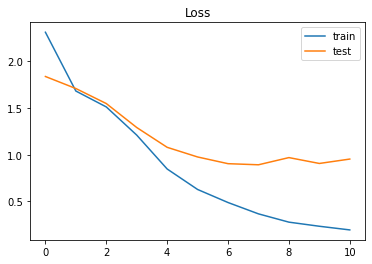

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
new_complaint = ['The police officer beat me violently.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Operation/Personnel Violations', 'Use Of Force', 'Illegal Search', 'Lockup Procedures', 'Verbal Abuse', 'False Arrest', 'Conduct Unbecoming (Off-Duty)', 'Traffic', 'Criminal Misconduct', 'Domestic', 'Supervisory Responsibilities', 'Drug / Alcohol Abuse', 'Bribery / Official Corruption','Money / Property','First Amendment','Unknown','Racial Profiling','Excessive Force','Medical']
print(pred, labels[np.argmax(pred)])

[[1.0476216e-02 1.6276800e-03 1.8676515e-03 5.2242414e-03 3.0487163e-03
  3.5333028e-03 3.7485335e-02 9.2879039e-01 2.6779559e-03 8.8565249e-04
  2.7407457e-03 1.6421608e-03]] Traffic
